In [1]:
# Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
# Cell 2
# Example dataset: Pima Indians Diabetes Dataset
# Download from UCI: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
data = pd.read_csv(r"C:\Users\adilj\Documents\assignment1\task1\diabetes.csv")   # change file name if using heart.csv etc.
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Cell 3
# Replace 0s in certain columns with NaN (in this dataset, 0 means missing for some features)
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# Fill missing values with median
data = data.fillna(data.median())
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
# Cell 4
scaler = MinMaxScaler()
numeric_cols = data.drop("Outcome", axis=1).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [7]:
# Cell 5
# For diabetes dataset, no categorical features exist.
# Example if using heart dataset:
# le = LabelEncoder()
# data['Sex'] = le.fit_transform(data['Sex'])

print("Categorical encoding step skipped (no categorical columns).")

# View statistics
data.describe()


Categorical encoding step skipped (no categorical columns).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.240305,0.152250,0.291518,0.168179,0.204015,0.348958
std,0.198210,0.196376,0.123435,0.095557,0.103826,0.140597,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.489796,0.239130,0.133413,0.288344,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


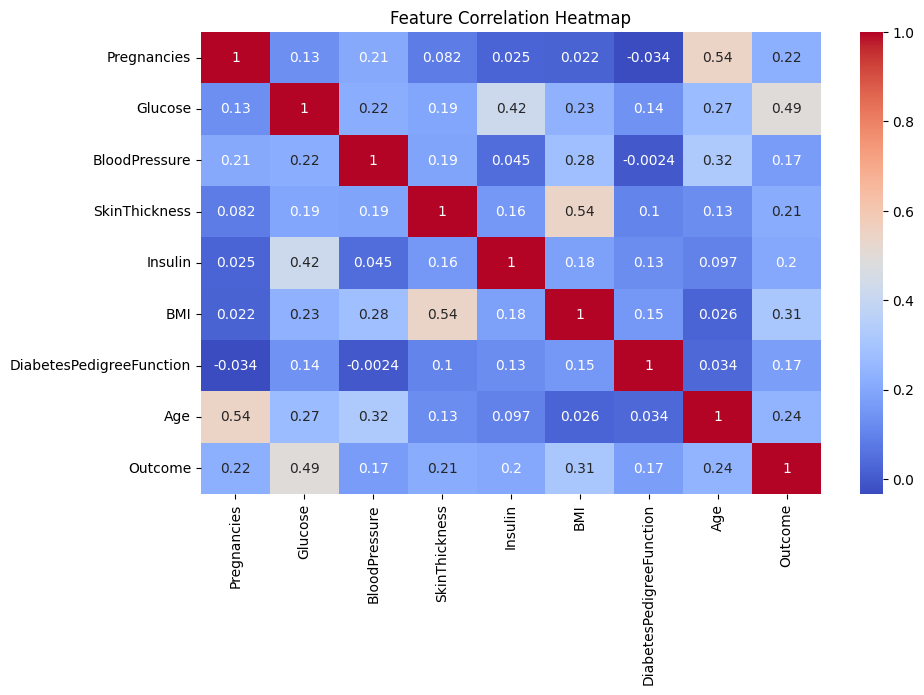

In [8]:
# Cell 6
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
# Cell 7
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
# Cell 8
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")


Logistic Regression Accuracy: 0.7078


In [12]:
# Cell 9
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Random Forest Accuracy: 0.7727


In [13]:
# Cell 10
print("Model Comparison:")
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")

if acc_log > acc_rf:
    print("✅ Logistic Regression performed better")
else:
    print("✅ Random Forest performed better")


Model Comparison:
Logistic Regression Accuracy: 0.7078
Random Forest Accuracy: 0.7727
✅ Random Forest performed better
